In [13]:
!pip install mne
import mne

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#fig = ssvep_raw.plot_sensors(show_names=True, sphere='eeglab')
#channels = pd.read_csv('task-meditation_channels.tsv', sep = '\t')

In [36]:
raw = mne.io.read_raw_bdf('sub3_session1.bdf')
raw.info.set_montage('standard_1020')
print(raw, raw.info)

Extracting EDF parameters from /content/sub3_session1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF | sub3_session1.bdf, 44 x 66560 (260.0 s), ~65 kB, data not loaded> <Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, F3, F7, FT7, FC3, FC1, C5, T7, TP7, CP5, CP3, CP1, P1, ...
 chs: 43 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 46 items (3 Cardinal, 43 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2023-02-22 11:00:45 UTC
 nchan: 44
 projs: []
 sfreq: 256.0 Hz
>


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


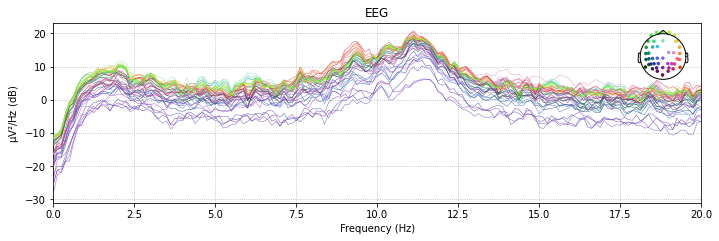

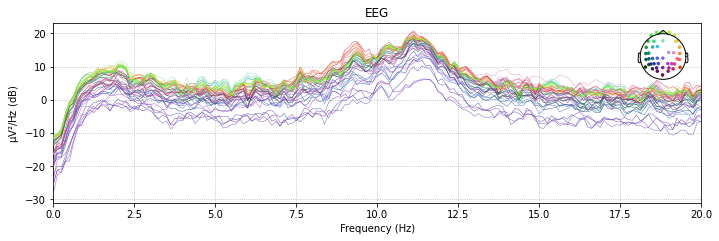

In [69]:
raw.plot_psd(fmax=20)
#raw.plot(duration=raw.__len__(), n_channels=30)

In [57]:
events = mne.find_events(raw)

epochs = mne.Epochs(raw, events, preload=True)

Trigger channel has a non-zero initial value of 131071 (consider using initial_event=True to detect this event)
26 events found
Event IDs: [131071]
Not setting metadata
26 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 26 events and 180 original time points ...
0 bad epochs dropped


array([[  4375,    407, 131071],
       [  5708,    407, 131071],
       [  6467,    815, 131071],
       [ 11581,    407, 131071],
       [ 17247,    407, 131071],
       [ 19256,    407, 131071],
       [ 19943,    815, 131071],
       [ 24767,    407, 131071],
       [ 26758,    407, 131071],
       [ 27605,    815, 131071],
       [ 32520,    407, 131071],
       [ 34530,    407, 131071],
       [ 35304,   1223, 131071],
       [ 36537,    407, 131071],
       [ 37311,   1223, 131071],
       [ 37861,    815, 131071],
       [ 42867,    407, 131071],
       [ 47952,    407, 131071],
       [ 49965,    407, 131071],
       [ 50667,    815, 131071],
       [ 55663,    407, 131071],
       [ 57559,    407, 131071],
       [ 58230,   1223, 131071],
       [ 63340,    407, 131071],
       [ 65353,    407, 131071],
       [ 66027,    815, 131071]])

In [58]:
event_dict = {'Interruption': 131071}
event_dict

{'Interruption': 131071}

In [59]:
epochs

Number of events,26
Events,131071: 26
Time range,-0.199 – 0.500 sec
Baseline,-0.199 – 0.000 sec


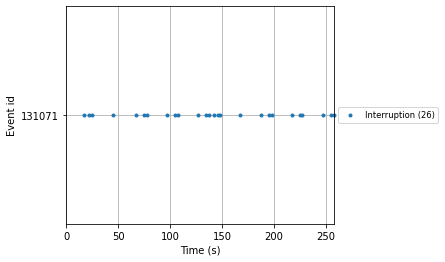

In [60]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'])

Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


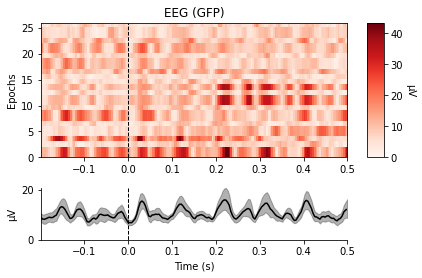

[<Figure size 432x288 with 3 Axes>]

In [47]:
epochs.plot_image()

combining channels using "gfp"


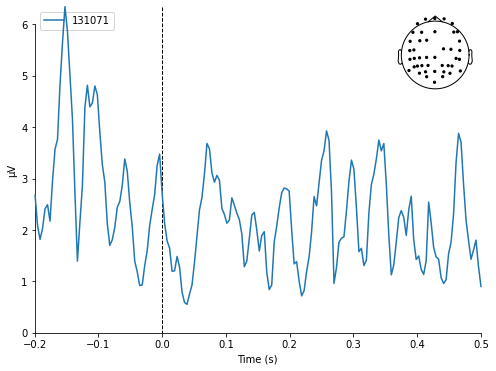

[<Figure size 576x432 with 2 Axes>]

In [62]:
#raw.plot_sensors(ch_type = 'eeg')
'''
for i in raw.ch_names:
  epochs.plot_image(picks=i)
'''
evoked = epochs.average()

mne.viz.plot_compare_evokeds(evoked,
                             legend='upper left', show_sensors='upper right')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.5s finished


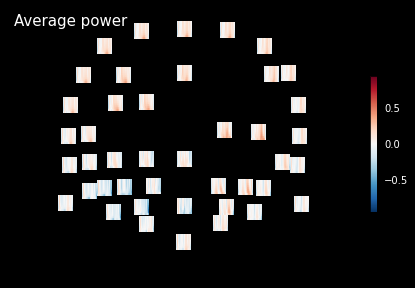

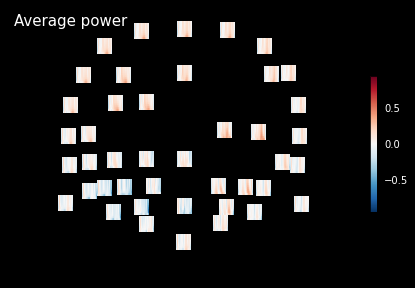

In [68]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


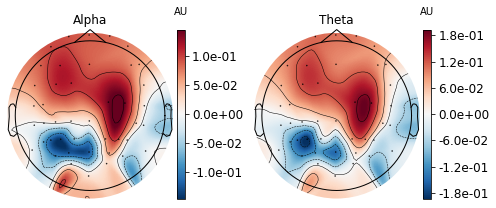

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
topomap_kw = dict(ch_type='eeg', tmin=-0.2, tmax=0.5, baseline=(-0.5, 0),
                  mode='logratio', show=False)
plot_dict = dict(Alpha=dict(fmin=8, fmax=12), Theta=dict(fmin=4, fmax=8))
for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)
fig.tight_layout()
fig.show()

# Useful Links
https://mne.tools/stable/auto_tutorials/intro/10_overview.html#epoching-continuous-data 

https://mne.tools/stable/auto_tutorials/time-freq/20_sensors_time_frequency.html#time-frequency-analysis-power-and-inter-trial-coherence

https://www.youtube.com/watch?v=IYuAPisoUeI

https://www.youtube.com/watch?v=t-twhNqgfSY&t=1549s
https://github.com/hoechenberger/pybrain_mne/blob/main/01-read_raw_crop_filter.ipynb

# ERSP (if possible)
https://mne.tools/stable/auto_examples/time_frequency/time_frequency_erds.html
 - We're looking for ERSP plots, something like page 7 on the paper

https://www.fieldtriptoolbox.org/workshop/madrid2019/tutorial_freq/#tfr-with-fixed-length-windows
 - Look at anything having to do with "sliding window" or "fixed window length"